In [79]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
import sklearn.preprocessing
from tqdm import tqdm
import pandas as pd
import seaborn as sns

# Label EDA

In [118]:
label = pd.read_csv('../data/label.csv', index_col=0)

In [119]:
mtat = label[label['data_origin']== 1]
gtzan = label[label['data_origin']== 0]

### mtat

In [120]:
mtat.head()

,no voice,singer,duet,plucking,hard rock,world,bongos,harpsichord,sitar,chorus,...,rap,metal,hiphop,quick,water,baroque,fiddle,english,filepath,data_origin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1


In [121]:
mtat = mtat.drop(['data_origin'], axis=1)

In [123]:
mtat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25863 entries, 0 to 25862
Columns: 170 entries, no voice to filepath
dtypes: int64(169), object(1)
memory usage: 33.7+ MB


Checking the distribution of the number of labels per row

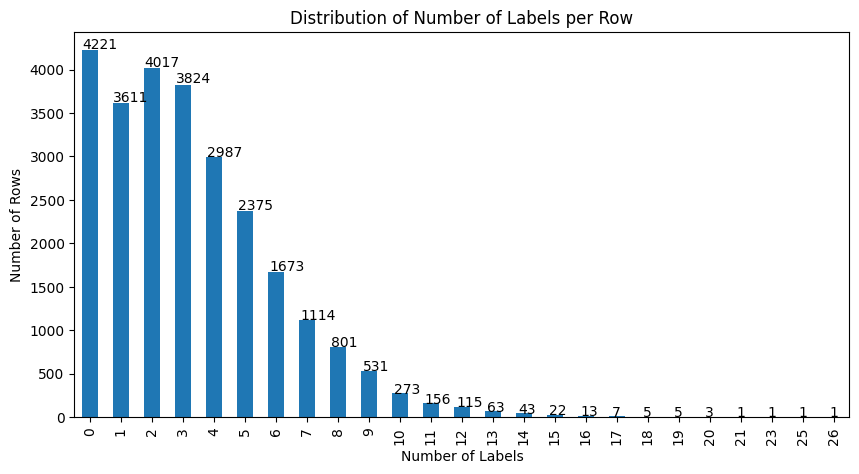

In [124]:
# Count the number of labels per row
label_counts_per_row = mtat.iloc[:,:-1].sum(axis=1)

# Count the frequency of rows with 'n' labels
rows_with_n_labels = label_counts_per_row.value_counts().sort_index()

# Plotting the distribution of 'n' labels
plt.figure(figsize=(10, 5))
bars = rows_with_n_labels.plot(kind='bar')
plt.title('Distribution of Number of Labels per Row')
plt.xlabel('Number of Labels')
plt.ylabel('Number of Rows')

# Add text annotations
for p in bars.patches:
    bars.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [125]:
# Calculate the sum of labels for each row
row_label_sum = mtat.iloc[:, :-1].sum(axis=1)  # Adjust the slice as needed

# Filter rows where the sum of labels is zero
rows_with_no_labels = mtat[row_label_sum == 0]
rows_with_no_labels


,no voice,singer,duet,plucking,hard rock,world,bongos,harpsichord,sitar,chorus,...,choir,rap,metal,hiphop,quick,water,baroque,fiddle,english,filepath
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mtat/c/lvx_nova-lvx_nova-01-contimune-175-204.mp3
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mtat/0/american_bach_soloists-j_s__bach__canta...
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mtat/f/the_headroom_project-jetuton_andawai-01...
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mtat/9/american_bach_soloists-heinrich_schutz_...
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mtat/9/american_bach_soloists-heinrich_schutz_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mtat/9/american_baroque-dances_and_suites_of_r...
25823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mtat/8/jacob_heringman-blame_not_my_lute-34-th...
25832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mtat/3/musica_franca-boismortier__sonatas_for_...
25833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mtat/3/musica_franca-boismortier__sonatas_for_...


In [35]:
# delete rows with 0 label
mtat = mtat[row_label_sum != 0]

In [126]:
mtat.shape

(25863, 170)

Checking the distribution of label

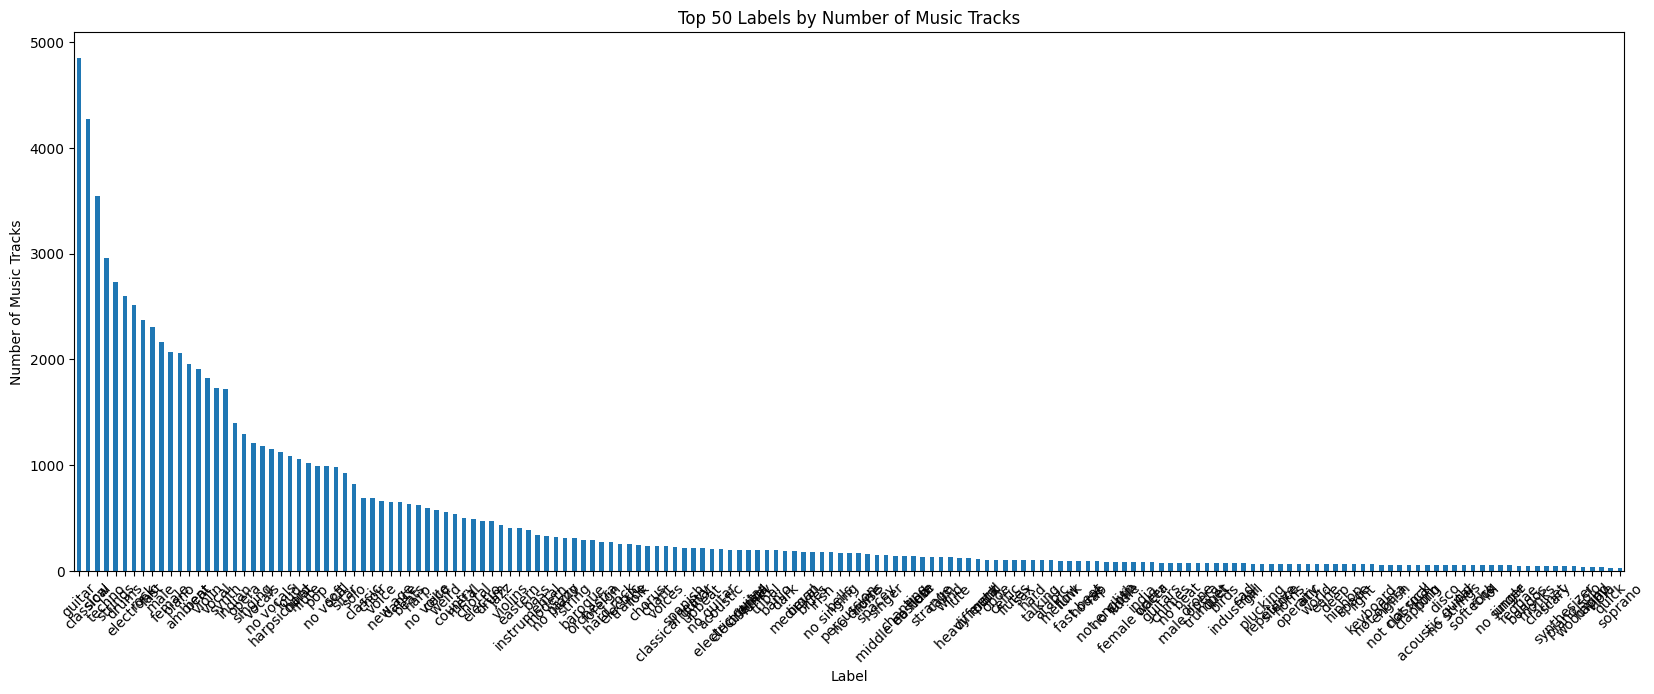

In [127]:
# Count the number of rows with each label
label_counts = mtat.iloc[:,:-1].sum(axis=0)
# Plot only the top 20 most common labels
# top_label_counts = label_counts.nlargest(50)

plt.figure(figsize=(20, 7))  # Adjust figure size as needed
bars = label_counts.sort_values(ascending=False).plot(kind='bar')  

plt.title('Labels by Number of Music Tracks')
plt.xticks(rotation=45)  # A slight rotation can sometimes help with readability
plt.ylabel('Number of Music Tracks')
plt.xlabel('Label')

plt.show()


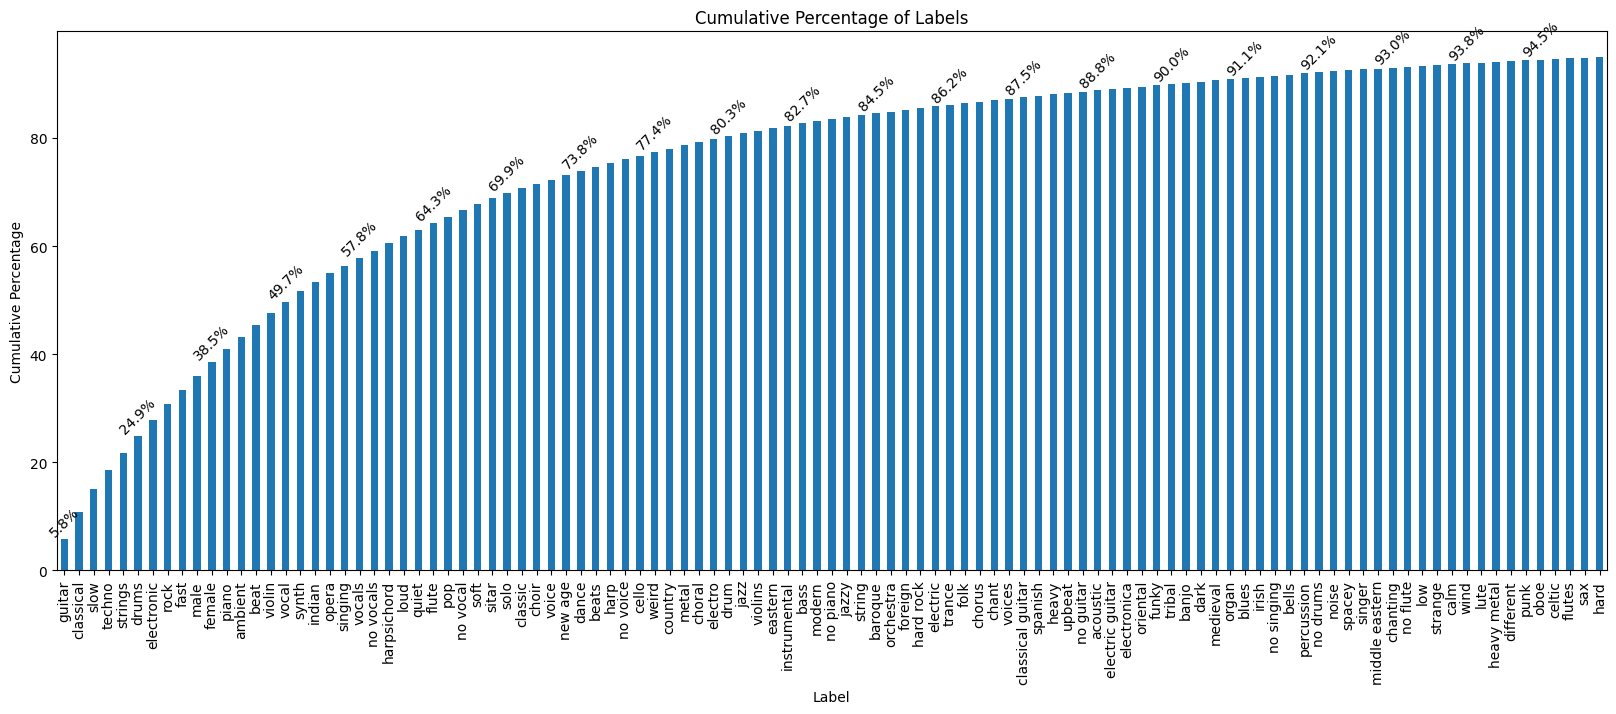

In [138]:

# Count the number of rows with each label
label_counts = mtat.iloc[:,:-1].sum(axis=0)

# Calculate cumulative percentage of the total labels
label_counts_sorted = label_counts.sort_values(ascending=False)
cumulative_percentage = label_counts_sorted.cumsum() / label_counts_sorted.sum() * 100

# Find the last index where cumulative percentage is less than or equal to 80
last_index = cumulative_percentage[cumulative_percentage <= 95].last_valid_index()

# Slice the cumulative_percentage to include only up to the last index where cumulative percentage is less than or equal to 80
cumulative_percentage_limited = cumulative_percentage.loc[:last_index]

plt.figure(figsize=(20, 7))  # Adjust figure size as needed
cumulative_percentage_limited.plot(kind='bar')

plt.title('Cumulative Percentage of Labels')
plt.xticks(rotation=90)  # Rotate the labels for better visibility
plt.ylabel('Cumulative Percentage')
plt.xlabel('Label')

# Add the cumulative percentage text above every 5 bars
for i, value in enumerate(cumulative_percentage_limited):
    if i % 5 == 0:  # Only label every 5th bar
        plt.text(i, value, f"{value:.1f}%", ha='center', va='bottom', rotation=45)


# Show the plot
plt.show()

In [145]:
# Check how many label it takes to reach 80% of the total count
for i in [80,85,90,95,98,99]:
    print(f'{i}% : {cumulative_percentage[cumulative_percentage<i].count()} labels')

80% : 45 labels
85% : 57 labels
90% : 76 labels
95% : 105 labels
98% : 137 labels
99% : 151 labels


In [149]:
# Find the last index where cumulative percentage is less than or equal to 80
last_index = cumulative_percentage[cumulative_percentage <= 95].last_valid_index()
# Slice the cumulative_percentage to include only up to the last index where cumulative percentage is less than or equal to 80
cumulative_percentage_limited = cumulative_percentage.loc[:last_index]

# First, we find the labels that make up to 80% of the cumulative percentage.
mtat_95 = cumulative_percentage_limited.index.tolist()

mtat_filtered = mtat.loc[mtat[mtat_95].sum(axis=1) >= 1]

mtat_filtered.info()  # Display the first few rows of the filtered dataframe to verify


<class 'pandas.core.frame.DataFrame'>
Index: 21515 entries, 0 to 25862
Columns: 170 entries, no voice to filepath
dtypes: int64(169), object(1)
memory usage: 28.1+ MB


In [154]:
# Find the last index where cumulative percentage is less than or equal to 95%
last_index_90 = cumulative_percentage[cumulative_percentage <= 90].last_valid_index()
# Get the labels that make up to 95% of the cumulative percentage
labels_upto_90_percent = cumulative_percentage.loc[:last_index_90].index.tolist()

# Filter the 'mtat' dataframe to keep only the rows that have at least one '1' in the labels that make up to 95% of the cumulative percentage
mtat_90 = mtat.loc[mtat[labels_upto_90_percent].sum(axis=1) >= 1]

# Drop the columns (labels) that are not in the top 95%
mtat_90 = mtat_95[labels_upto_90_percent]

mtat_90.info()  # Display the dataframe information to verify


<class 'pandas.core.frame.DataFrame'>
Index: 21515 entries, 0 to 25862
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   guitar            21515 non-null  int64
 1   classical         21515 non-null  int64
 2   slow              21515 non-null  int64
 3   techno            21515 non-null  int64
 4   strings           21515 non-null  int64
 5   drums             21515 non-null  int64
 6   electronic        21515 non-null  int64
 7   rock              21515 non-null  int64
 8   fast              21515 non-null  int64
 9   male              21515 non-null  int64
 10  female            21515 non-null  int64
 11  piano             21515 non-null  int64
 12  ambient           21515 non-null  int64
 13  beat              21515 non-null  int64
 14  violin            21515 non-null  int64
 15  vocal             21515 non-null  int64
 16  synth             21515 non-null  int64
 17  indian            21515 non-null  in

# Audio EDA

In [55]:
# Load the audio file
# AUDIO_FILE = '../data/gtzan/genres_original/jazz/jazz.00000.wav'
AUDIO_FILE = '../data/mtat/6/barry_phillips-trad-01-polska_fran_glava-0-29.mp3'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None, mono=False)

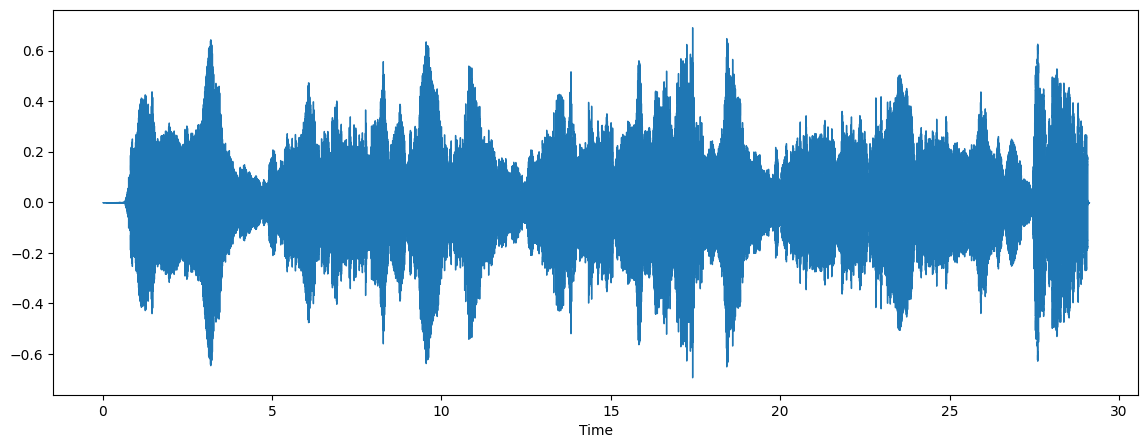

In [56]:
# waveform 
plt.figure(figsize=(14,5))
librosa.display.waveshow(samples, sr=sample_rate)

In [67]:
Audio(AUDIO_FILE)

In [57]:
if samples.ndim == 1:
    print('mono')
else:
    print(f'{samples.shape[0]} Channels')

mono


In [58]:
# Get the size of the audio file in time (seconds)
print(librosa.get_duration(y=samples, sr=sample_rate))

29.124


C:\Users\syeon\AppData\Local\Temp\ipykernel_24052\2803378968.py:2: UserWarning:

Trying to display complex-valued input. Showing magnitude instead.



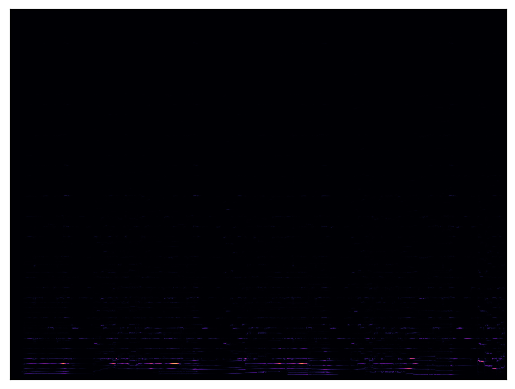

In [60]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)                         

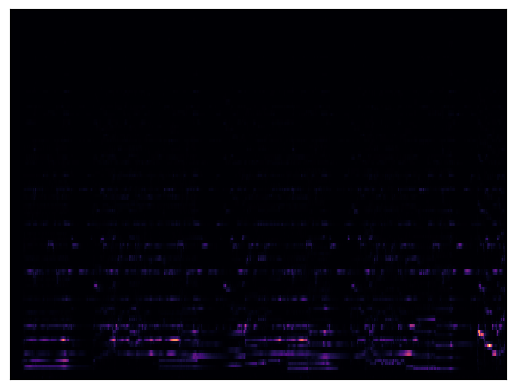

In [61]:
# use the mel-scale+decibel instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)  

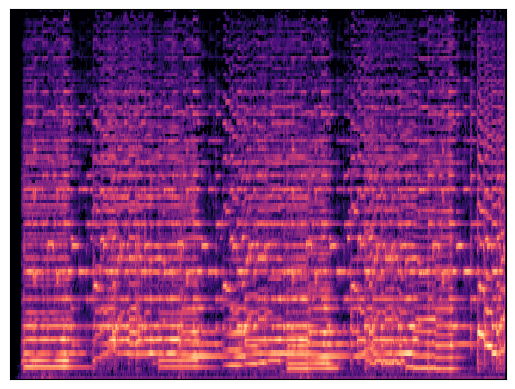

In [62]:
# Convert the Mel spectrogram to the log Mel spectrogram 
# Basically using dB values for amplitude
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.max)
librosa.display.specshow(log_mel_sgram)  

Iterate all data

In [150]:
def create_metadata(audio_file):
    root_dir = '../data/'
    AUDIO_FILE = root_dir+audio_file
    samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
    
    # Get channel count
    channels = 1 if samples.ndim == 1 else samples.shape[0]

    duration = librosa.get_duration(y=samples, sr=sample_rate)
    
    return sample_rate, channels, duration

In [70]:
# Initialize an empty list to store the data
metadata = []
error_files = []  # List to store paths of problematic files

# Iterate over the filepaths in the subset DataFrame
for file in tqdm(mtat['filepath'], desc='Processing audio files'):
    try:
        sample_rate, channels, duration = create_metadata(file)
        # Create a dictionary of the data you want to store
        audio_info = {
            'filepath': file,
            'audio_channels': channels, 
            'sampling_rate': sample_rate,
            'audio_length': duration,
            # Add more features if needed
        }
        # Append the dictionary to your list
        metadata.append(audio_info)

    except Exception as e: 
        print(f"Failed to process {file}: {e}")  # Corrected to use 'file' instead of 'value'
        error_files.append({'filepath': file, 'error': str(e)})

# Convert the list of dictionaries to a new DataFrame
metadata_df = pd.DataFrame(metadata)
error_df = pd.DataFrame(error_files)

Processing audio files:  60%|█████▉    | 13517/22642 [04:02<02:40, 56.77it/s]C:\Users\syeon\AppData\Local\Temp\ipykernel_24052\1044205948.py:4: UserWarning:

PySoundFile failed. Trying audioread instead.

C:\Users\syeon\Google Drive\CBS\ITU_AdvancedML\venv\Lib\site-packages\librosa\core\audio.py:183: FutureWarning:

librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.

Processing audio files:  60%|█████▉    | 13524/22642 [04:02<02:32, 59.71it/s]

Failed to process mtat/6/norine_braun-now_and_zen-08-gently-117-146.mp3: 


Processing audio files:  92%|█████████▏| 20804/22642 [06:41<00:32, 56.36it/s]

Failed to process mtat/8/jacob_heringman-josquin_des_prez_lute_settings-19-gintzler__pater_noster-204-233.mp3: 


Processing audio files:  94%|█████████▍| 21381/22642 [06:52<00:22, 56.30it/s]

Failed to process mtat/9/american_baroque-dances_and_suites_of_rameau_and_couperin-25-le_petit_rien_xiveme_ordre_couperin-88-117.mp3: 


Processing audio files:  98%|█████████▊| 22212/22642 [07:02<00:03, 107.94it/s]

Failed to process gtzan/genres_original/jazz/jazz.00054.wav: 


Processing audio files: 100%|██████████| 22642/22642 [07:06<00:00, 53.06it/s] 


In [72]:
error_df

,filepath,error
0,mtat/6/norine_braun-now_and_zen-08-gently-117-...,
1,mtat/8/jacob_heringman-josquin_des_prez_lute_s...,
2,mtat/9/american_baroque-dances_and_suites_of_r...,
3,gtzan/genres_original/jazz/jazz.00054.wav,


In [73]:
Audio('../data/gtzan/genres_original/jazz/jazz.00054.wav')

In [77]:
# delete those from the label data
error_file_set = set(error_df['filepath'])
label  = label[~label['filepath'].isin(error_file_set)]

In [71]:
metadata_df

,filepath,audio_channels,sampling_rate,audio_length
0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1,16000,29.124000
1,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1,16000,29.124000
2,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1,16000,29.124000
3,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1,16000,29.124000
4,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1,16000,29.124000
...,...,...,...,...
22633,gtzan/genres_original/rock/rock.00095.wav,1,22050,30.013333
22634,gtzan/genres_original/rock/rock.00096.wav,1,22050,30.013333
22635,gtzan/genres_original/rock/rock.00097.wav,1,22050,30.013333
22636,gtzan/genres_original/rock/rock.00098.wav,1,22050,30.013333


In [74]:
metadata_df.audio_channels.value_counts()
# only mono data

audio_channels
1    22638
Name: count, dtype: int64

In [75]:
metadata_df.sampling_rate.value_counts()

sampling_rate
16000    21639
22050      999
Name: count, dtype: int64

In [76]:
metadata_df.audio_length.value_counts()
# we need standardizing audio length

audio_length
29.124000    21639
30.013333      640
30.000181      295
30.648889       10
29.995828        5
30.007982        4
30.011791        4
30.370975        3
30.171429        3
30.291156        3
30.351020        3
30.241270        2
30.301134        2
30.081633        2
29.992925        2
30.091610        2
30.021769        1
30.480726        1
30.201361        1
30.271202        1
30.000000        1
30.400907        1
30.281179        1
29.931973        1
30.121542        1
30.131519        1
30.161451        1
30.211338        1
30.101587        1
29.981859        1
30.331066        1
30.071655        1
30.488980        1
30.390930        1
30.360998        1
Name: count, dtype: int64